In [61]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from threshold import learn_model, apply_model, accuracy

%matplotlib inline

In [62]:
# We load the data with load_iris from sklearn
data = load_iris()
features = data['data']
feature_names = data['feature_names']
target = data['target']

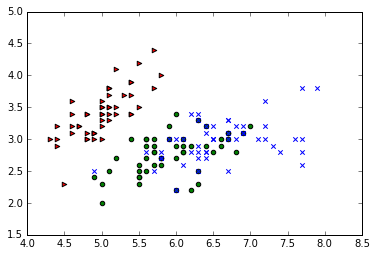

In [63]:
for t,marker,c in zip(xrange(3),">ox","rgb"):
    # We plot each class on its own to get different colored markers
    plt.scatter(features[target == t,0],
                features[target == t,1],
                marker=marker, c=c)

In [64]:
import itertools

pairs = []

for i,p in enumerate(list(itertools.product(range(4), range(4)))):
    if p not in pairs and (p[1], p[0]) not in pairs and p[0] != p[1]:
        pairs.append(p)
        
print pairs

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]


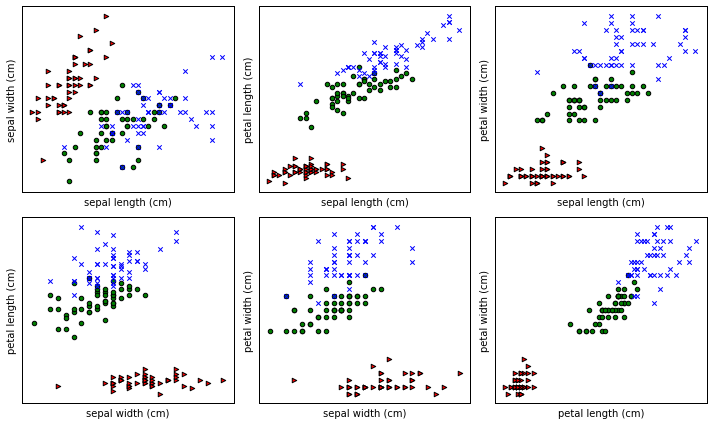

In [65]:
plt.figure(figsize=(10,6))
for i,(p0,p1) in enumerate(pairs):
    plt.subplot(2,3,i+1)
    for t,marker,c in zip(xrange(3),">ox","rgb"):
        # We plot each class on its own to get different colored markers
#         target_name = data['target_names'][t]
        plt.scatter(features[target == t,p0],
                    features[target == t,p1],
                    marker=marker, c=c)
        plt.xlabel(feature_names[p0])
        plt.ylabel(feature_names[p1])
        plt.xticks([])
        plt.yticks([])
    
    plt.tight_layout()

## Building our first classification model

In [66]:
labels = data['target_names'][data['target']]

In [68]:
plength = features[:, 2]
# use numpy operations to get setosa features
is_setosa = (labels == 'setosa')
# This is the important step:
max_setosa = plength[is_setosa].max()
min_non_setosa = plength[~is_setosa].min()
print('Maximum of setosa: {0}.'.format(max_setosa))
print('Minimum of others: {0}.'.format(min_non_setosa))

Maximum of setosa: 1.9.
Minimum of others: 3.0.


In [69]:
# if features[:,2] < 2: print 'Iris Setosa'
# else: print 'Iris Virginica or Iris Versicolour'

labels[features[:,2] < 2]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa'], 
      dtype='|S10')

In [70]:
# th = threshold
# fi = features
# model = (best_t, best_fi)
naive_model = (2.0, 2)

In [71]:
def apply_model(features, model):
    t, fi = model
    return features[:,fi] < t

In [72]:
labels[target[apply_model(features, naive_model)]]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa'], 
      dtype='|S10')

In [75]:
labels[target[is_setosa]]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa'], 
      dtype='|S10')

In [77]:
(labels[target[apply_model(features, naive_model)]] == labels[target[is_setosa]]).mean()

1.0

## resetting variables, be careful of rerunning cells above

In [78]:
# the non-Setosa features and labels:
features = features[~is_setosa]
labels = labels[~is_setosa]
virginica = (labels == 'virginica')

In [79]:
# run a loop over all possible features and thresholds to see which one results in better accuracy
# Accuracy is simply the fraction of examples that the model classifies correctly

best_acc = -1.0
for fi in xrange(features.shape[1]):
    # We are going to generate all possible threshold for this feature
    thresh = features[:,fi].copy()
    thresh.sort()
    # Now test all thresholds:
    for t in thresh:
        pred = (features[:,fi] > t)
        acc = (pred == virginica).mean()
        if acc > best_acc:
            best_acc = acc
            best_fi = fi
            best_t = t

In [80]:
print best_acc, feature_names[best_fi], best_t

0.94 petal width (cm) 1.6


In [55]:
virginica

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

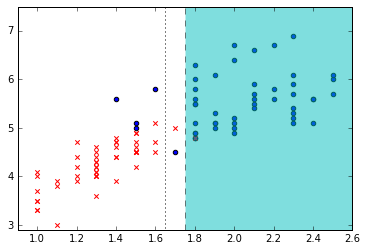

In [90]:
# for t,marker,c in zip(xrange(3),">ox","rgb"):
#     # We plot each class on its own to get different colored markers
#     plt.scatter(features[target == t,0],
#                 features[target == t,1],
#                 marker=marker, c=c)

t_x = np.ones(50) * 1.65
t_y = np.linspace(2,8)
plt.scatter(features[virginica, best_fi], features[virginica, 2], marker='o', c='b')
plt.scatter(features[~virginica, best_fi], features[~virginica, 2], marker='x', c='r')

plt.plot(t_x, t_y, 'k:')
plt.xlim((.9,2.6))
plt.ylim((2.9,7.5))

plt.axvspan(1.75, 2.6, facecolor='c', alpha=0.5, ls='--')

In [91]:
error = 0.0
for ei in range(len(features)):
    # select all but the one at position 'ei':
    training = np.ones(len(features), bool)
    training[ei] = False
    testing = ~training
    model = learn_model(features[training], virginica[training])
    predictions = accuracy(features[testing], virginica[testing], model)
    error += np.sum(predictions != virginica[testing])

print error/len(features)

0.51


## nearest neighbor classification with Seeds

In [95]:
data = []
labels = []
with open('data/seeds.tsv', 'r') as ifile:
    for line in ifile:
        tokens = line.strip().split('\t')
        data.append([float(tk) for tk in tokens[:-1]])
        labels.append(tokens[-1])
data = np.array(data)
labels = np.array(labels)

In [96]:
data

array([[ 15.26  ,  14.84  ,   0.871 , ...,   3.312 ,   2.221 ,   5.22  ],
       [ 14.88  ,  14.57  ,   0.8811, ...,   3.333 ,   1.018 ,   4.956 ],
       [ 14.29  ,  14.09  ,   0.905 , ...,   3.337 ,   2.699 ,   4.825 ],
       ..., 
       [ 13.2   ,  13.66  ,   0.8883, ...,   3.232 ,   8.315 ,   5.056 ],
       [ 11.84  ,  13.21  ,   0.8521, ...,   2.836 ,   3.598 ,   5.044 ],
       [ 12.3   ,  13.34  ,   0.8684, ...,   2.974 ,   5.637 ,   5.063 ]])

<function view>